<a href="https://colab.research.google.com/github/Tim-g-t/1skills-review-pull-requests/blob/main/Project_2_Data_Loading_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Use Google Drive link to view a folder I shared with @columbia.edu google drive users
https://drive.google.com/drive/folders/18O-BnGOIw9ZiUwy17Uk_361xyfTF-qAN?usp=sharing
## 2. Right click folder and click "Add shortcut to Drive"
This will make sure the zipfile in this folder is accessible in your personal drive folder


In [2]:
from IPython.display import Image
from IPython.core.display import HTML

# Chest X-Ray Image Classification Project

## Dataset Overview
The dataset used in this project consists of chest X-ray images categorized into three classes:
1. **COVID-19**: 3,616 images
2. **Normal**: 10,192 images
3. **Viral Pneumonia**: 1,345 images

In total, there are 15,153 images. For balanced training purposes, an equal number of images (1,344) from each category were selected to avoid class imbalance.

## Motivation for the Model
Building a predictive model using this dataset has several practical applications:

1. **Rapid Diagnosis**: Automated detection of COVID-19 and other lung infections from chest X-rays can significantly speed up the diagnostic process, allowing for quicker clinical decisions.
2. **Resource Optimization**: In areas with limited access to specialized medical professionals or during times when healthcare systems are overwhelmed (e.g., during a pandemic), such models can assist in preliminary screening.
3. **Reduction of Diagnostic Errors**: Machine learning models can serve as a second opinion, potentially reducing human error and increasing the overall accuracy of diagnoses.
4. **Monitoring and Surveillance**: Public health institutions can use these models for large-scale screening and monitoring of disease spread, aiding in epidemiological studies and response strategies.

## Beneficiaries of the Model
The model has multiple stakeholders and potential beneficiaries:
- **Radiologists and Clinicians**: The model can assist in interpreting X-ray images more efficiently.
- **Hospitals and Healthcare Systems**: Automated screening can alleviate workloads and help optimize resource allocation.
- **Public Health Agencies**: Enhanced surveillance capabilities can inform policy decisions and public health interventions.
- **Patients**: Faster and more accurate diagnoses lead to timely treatment, which can improve patient outcomes.

---

In this notebook, we will explore the dataset, preprocess the images, and develop a classification model to distinguish between COVID-19, Normal, and Viral Pneumonia cases.


In [3]:
# Step 2.1
Image(url= "https://github.com/user-attachments/assets/6515aa71-484b-4364-ac44-2331477720e8", width=600, height=300)

In [4]:
# Step 2.2
Image(url= "https://github.com/user-attachments/assets/0d0d8f6c-a868-49c4-9e38-54f3006af39b", width=600, height=300)

## 3. Reference Code for Project 2

In [2]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

# content in your drive is now available via "/content/drive/My Drive"


Mounted at /content/drive


In [3]:
# Import data and unzip files to folder
!unzip -q /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

In [7]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


In [8]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-2679.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2189.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3433.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3233.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2494.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3173.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1379.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1776.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3481.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3333.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-307.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1713.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2712.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-591.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1158.png', 'COVID-19_Radiography_Dataset/COVID/images/C

In [9]:
#Reduce number of images to first 1345 for each category
fnames[0]=fnames[0][0:1344]
fnames[1]=fnames[1][0:1344]
fnames[2]=fnames[2][0:1344]

In [10]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single flower file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

In [11]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [12]:
len(image_filepaths)

4032

In [13]:
print(len(X) ) #same number of elements as filenames
print(X.shape ) #dimensions now 192,192,3 for all images
print(X.min().round() ) #min value of every image is zero
print(X.max() ) #max value of every image is one


4032
(4032, 192, 192, 3)
-0.0
1.0


In [14]:
len(fnames[2])

1344

In [15]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

# Recall that we have five folders with the following number of images in each folder
#...corresponding to each flower type

print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))

#combine into single list of y labels
y_labels = covid+normal+pneumonia

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
4027,False,False,True
4028,False,False,True
4029,False,False,True
4030,False,False,True


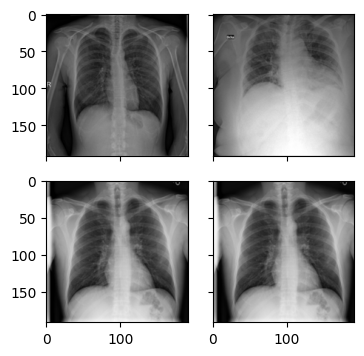

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor(fnames[0][0])
im2 =preprocessor(fnames[0][1])
im3 =preprocessor(fnames[1][1])
im4 =preprocessor(fnames[1][1])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

The dataset consists of chest x-ray images categorized as COVID, Normal, and Viral Pneumonia. Building a predictive model is practically useful because it can support diagnosis of lung infections, during pandemics or in regions with limited medical resources. By automating the identification of COVID-19 and other infections, the model can help radiologists by providing rapid, accurate assessments, reducing diagnostic workload, and minimizing errors. Radiologists, hospitals, and public health institutions could benefit significantly from it.

In [17]:
# ======Train test split resized images (Hackathon Note!! Use same train test split to be able to submit predictions to leaderboard!)=======================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)


X_test.shape, y_test.shape

((1291, 192, 192, 3), (1291, 3))

In [18]:
#Clear objects from memory
del(X)
del(y)
del(preprocessed_image_data)

In [19]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle

# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)

with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [20]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle

# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

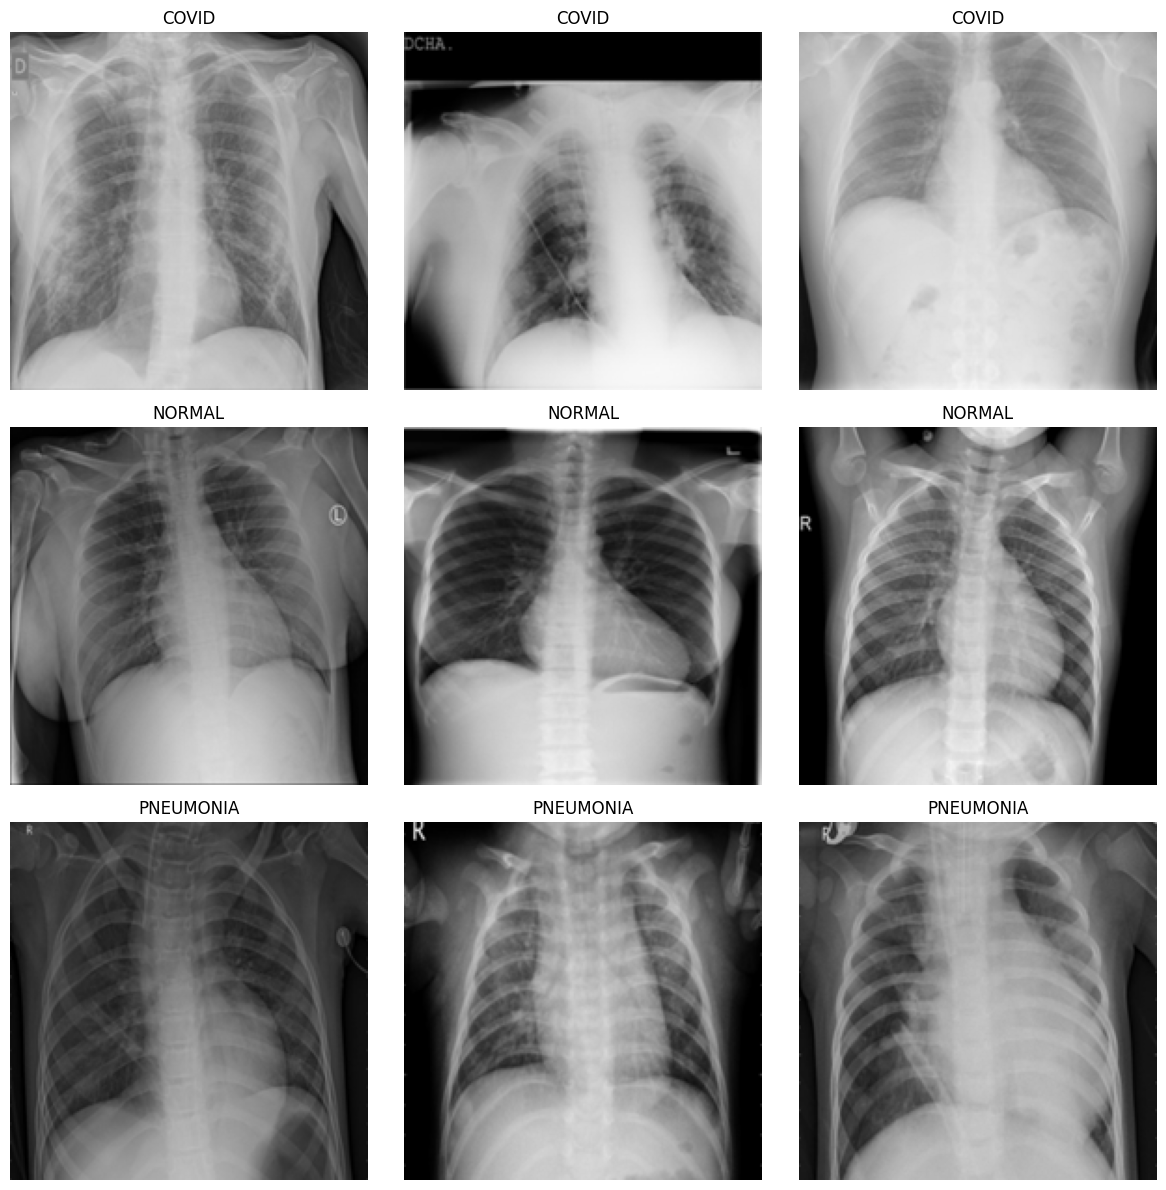

In [21]:
import random
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
categories = ['COVID', 'NORMAL', 'PNEUMONIA']

for i, category in enumerate(categories):
    for j in range(3):
        img_path = fnames[i][random.randint(0, len(fnames[i]) - 1)]
        img = preprocessor(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        axs[i, j].set_title(category)

plt.tight_layout()
plt.show()


In [22]:
# CCN model
def create_cnn_model():
    model = Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(192, 192, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.5931 - loss: 0.9517 - val_accuracy: 0.7405 - val_loss: 0.6364
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8441 - loss: 0.4092 - val_accuracy: 0.8675 - val_loss: 0.3416
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8804 - loss: 0.2990 - val_accuracy: 0.8714 - val_loss: 0.3100
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9163 - loss: 0.2350 - val_accuracy: 0.8830 - val_loss: 0.3122
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9235 - loss: 0.2236 - val_accuracy: 0.9094 - val_loss: 0.2659
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9348 - loss: 0.1959 - val_accuracy: 0.8970 - val_loss: 0.2866
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9467 - loss: 0.1517 - val_accuracy: 0.9016 - val_loss: 0.2896
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9670 - loss: 0.1026 - val_accuracy: 0.9101 -

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 192, 192, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 198, 198, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 96, 96, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 96, 96, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 96, 96, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 98, 98, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 48, 48, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 48, 48, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 48, 48, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 48, 48, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 48, 48, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 48, 48, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 48, 48, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 48, 48, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 48, 48, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,688,963 (98.00 MB)

 Trainable params: 2,101,251 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.3127 - loss: 1.2447
Epoch 1: val_loss improved from inf to 1.11865, saving model to best_resnet50_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 363ms/step - accuracy: 0.3129 - loss: 1.2442 - val_accuracy: 0.3338 - val_loss: 1.1186
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3478 - loss: 1.1798
Epoch 2: val_loss improved from 1.11865 to 1.07874, saving model to best_resnet50_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - accuracy: 0.3478 - loss: 1.1797 - val_accuracy: 0.3718 - val_loss: 1.0787
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.3607 - loss: 1.1390
Epoch 3: val_loss improved from 1.07874 to 1.07383, saving model to best_resnet50_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 245ms/step - accuracy: 0.3607 - loss: 1.1389 - val_accuracy: 0.3346 - val_loss: 1.0738
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.3814 - loss: 1.1143
Epoch 4: val_loss improved from 1.0

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.4271 - loss: 1.0512
Epoch 1: val_loss improved from 1.03304 to 1.00688, saving model to best_resnet50_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 355ms/step - accuracy: 0.4274 - loss: 1.0511 - val_accuracy: 0.4965 - val_loss: 1.0069
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.4990 - loss: 1.0219
Epoch 2: val_loss improved from 1.00688 to 0.98612, saving model to best_resnet50_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - accuracy: 0.4991 - loss: 1.0219 - val_accuracy: 0.5112 - val_loss: 0.9861
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.5074 - loss: 1.0049
Epoch 3: val_loss improved from 0.98612 to 0.94651, saving model to best_resnet50_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 243ms/step - accuracy: 0.5076 - loss: 1.0047 - val_accuracy: 0.6050 - val_loss: 0.9465
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.5260 - loss: 0.9841
Epoch 4: val_loss improved from

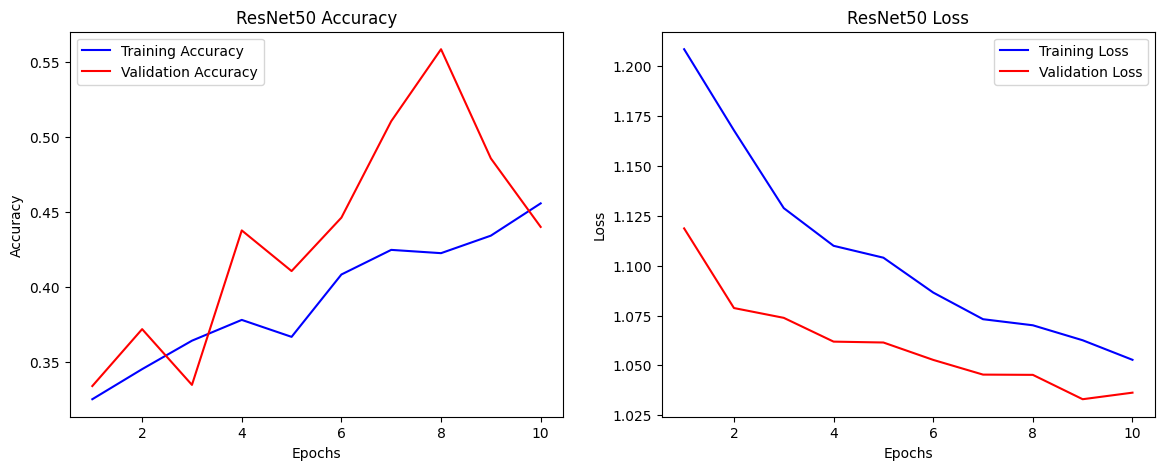

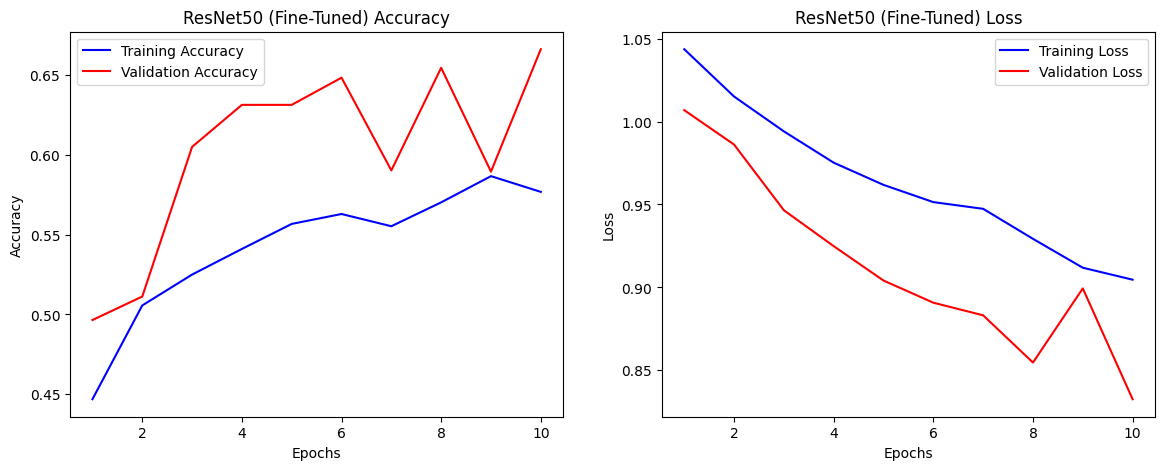

ResNet50 model saved as 'resnet50_model.keras'


In [23]:
# ResNet50 with Transfer Learning and Fine-Tuning

# Import necessary libraries
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np

# Define the ResNet50 model with transfer learning
def create_resnet50_model(input_shape=(192, 192, 3), num_classes=3):
    # Load the ResNet50 base model without the top layers and with pre-trained ImageNet weights
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model to prevent its weights from being updated during initial training
    base_model.trainable = False

    # Add custom top layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Global average pooling reduces each feature map to a single value
    x = Dense(1024, activation='relu')(x)  # Fully connected layer with 1024 units
    x = Dropout(0.5)(x)  # Dropout for regularization
    predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation for classification

    # Create the full model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model with Adam optimizer and categorical cross-entropy loss
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model, base_model  # Return both model and base_model

# Instantiate the ResNet50 model
resnet50_model, resnet50_base = create_resnet50_model()

# Display the model architecture
resnet50_model.summary()

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the generator to the training data
datagen.fit(X_train)

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_resnet50_model.keras',  # Changed extension to .keras
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,  # Ensure the entire model is saved
                             verbose=1)

# Train the ResNet50 model with data augmentation and callbacks
resnet50_history = resnet50_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=10,  # Changed from 50 to 10
    callbacks=[early_stop, checkpoint]
)

# Evaluate the ResNet50 model on the test set
resnet50_eval = resnet50_model.evaluate(X_test, y_test, verbose=0)
print(f"ResNet50 Test Accuracy: {resnet50_eval[1]*100:.2f}%")
print(f"ResNet50 Test Loss: {resnet50_eval[0]:.4f}")

# Fine-Tuning: Unfreeze some layers of ResNet50 and retrain
def fine_tune_resnet50(model, base_model, trainable_layers=50, learning_rate=1e-5):
    """
    Fine-tune the last 'trainable_layers' layers of the base_model.

    Args:
        model (Model): The complete model to fine-tune.
        base_model (Model): The base model whose layers will be unfrozen.
        trainable_layers (int): Number of layers from the end to unfreeze.
        learning_rate (float): Learning rate for fine-tuning.

    Returns:
        Model: The fine-tuned model.
    """
    # Ensure trainable_layers does not exceed the total number of layers in base_model
    trainable_layers = min(trainable_layers, len(base_model.layers))

    # Unfreeze the last 'trainable_layers' layers of the base model
    for layer in base_model.layers[-trainable_layers:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    # Re-compile the model with a lower learning rate
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Fine-tune the ResNet50 model
resnet50_model = fine_tune_resnet50(resnet50_model, resnet50_base, trainable_layers=10, learning_rate=1e-5)

# Continue training the fine-tuned ResNet50 model with data augmentation and callbacks
resnet50_finetune_history = resnet50_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=10,  # Changed from 50 to 10
    callbacks=[early_stop, checkpoint]
)

# Evaluate the fine-tuned ResNet50 model
resnet50_finetune_eval = resnet50_model.evaluate(X_test, y_test, verbose=0)
print(f"Fine-Tuned ResNet50 Test Accuracy: {resnet50_finetune_eval[1]*100:.2f}%")
print(f"Fine-Tuned ResNet50 Test Loss: {resnet50_finetune_eval[0]:.4f}")

# Function to plot training history
def plot_training_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training and validation history for ResNet50
plot_training_history(resnet50_history, 'ResNet50')
plot_training_history(resnet50_finetune_history, 'ResNet50 (Fine-Tuned)')

# Save the ResNet50 model
resnet50_model.save('resnet50_model.keras')  # Changed extension to .keras
print("ResNet50 model saved as 'resnet50_model.keras'")


In [24]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# Load images and labels
fnames = []
labels = []
for idx, category in enumerate(categories):
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    for file_name in file_names:
        full_path = os.path.join(image_folder, file_name)
        fnames.append(full_path)
        labels.append(idx)  # 0 for COVID, 1 for Normal, 2 for Viral Pneumonia

# Preprocess images to the correct format
def preprocessor(img_path):
    img = Image.open(img_path).convert("RGB").resize((192, 192))
    img = np.array(img) / 255.0
    return img

X = np.array([preprocessor(f) for f in fnames])

# One-hot
y = pd.get_dummies(labels).values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.32, random_state=1987)

#VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(192, 192, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)

# Define the final model
model_vgg16 = Model(inputs=base_model.input, outputs=outputs)

optimizer = Adam(learning_rate=0.001)
model_vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_vgg16.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

test_loss, test_accuracy = model_vgg16.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy:.2f}')

for layer in base_model.layers[-4:]:
    layer.trainable = True

# Fine-tuning
model_vgg16.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model_vgg16.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32, verbose=1)

test_loss, test_accuracy = model_vgg16.evaluate(X_test, y_test, verbose=1)
print(f'Fine-tuned Test Accuracy: {test_accuracy:.2f}')


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 63s 194ms/step - accuracy: 0.6841 - loss: 0.7470 - val_accuracy: 0.8316 - val_loss: 0.4435
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step - accuracy: 0.8147 - loss: 0.4501 - val_accuracy: 0.8787 - val_loss: 0.3470
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.8668 - loss: 0.3593 - val_accuracy: 0.9039 - val_loss: 0.2941
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.8761 - loss: 0.3335 - val_accuracy: 0.9146 - val_loss: 0.2481
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.8972 - loss: 0.2805 - val_accuracy: 0.9253 - val_loss: 0.2396
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.9034 - loss: 0.2631 - val_accuracy: 0.9306 - val_loss: 0.2140
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.9079 - loss: 0.2492 - val_accuracy: 0.9326 - val_loss: 0.2037
Epoch 8/10
258/258 ━━━━━━━━━━━━━

Total images loaded: 15153
Training set size: 10304
Testing set size: 4849
Shape of y_train: (10304, 3)
Shape of y_test: (4849, 3)
Preprocessing validation images...
Shape of resized test images: (4849, 224, 224, 3)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,6

 Total params: 14,780,739 (56.38 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Starting training without data augmentation...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.6973 - loss: 0.7161
Epoch 1: val_loss improved from inf to 0.47041, saving model to best_vgg16_model.keras
322/322 ━━━━━━━━━━━━━━━━━━━━ 102s 266ms/step - accuracy: 0.6975 - loss: 0.7158 - val_accuracy: 0.7911 - val_loss: 0.4704
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8107 - loss: 0.4655
Epoch 2: val_loss improved from 0.47041 to 0.36112, saving model to best_vgg16_model.keras
322/322 ━━━━━━━━━━━━━━━━━━━━ 76s 232ms/step - accuracy: 0.8107 - loss: 0.4654 - val_accuracy: 0.8684 - val_loss: 0.3611
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8568 - loss: 0.3773
Epoch 3: val_loss improved from 0.36112 to 0.29966, saving model to best_vgg16_model.keras
322/322 ━━━━━━━━━━━━━━━━━━━━ 69s 211ms/step - accuracy: 0.8568 - loss: 0.3773 - val_accuracy: 0.8934 - val_loss: 0.2997
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.8675 - loss: 0.3419
Epoch 4: val_loss improved fr

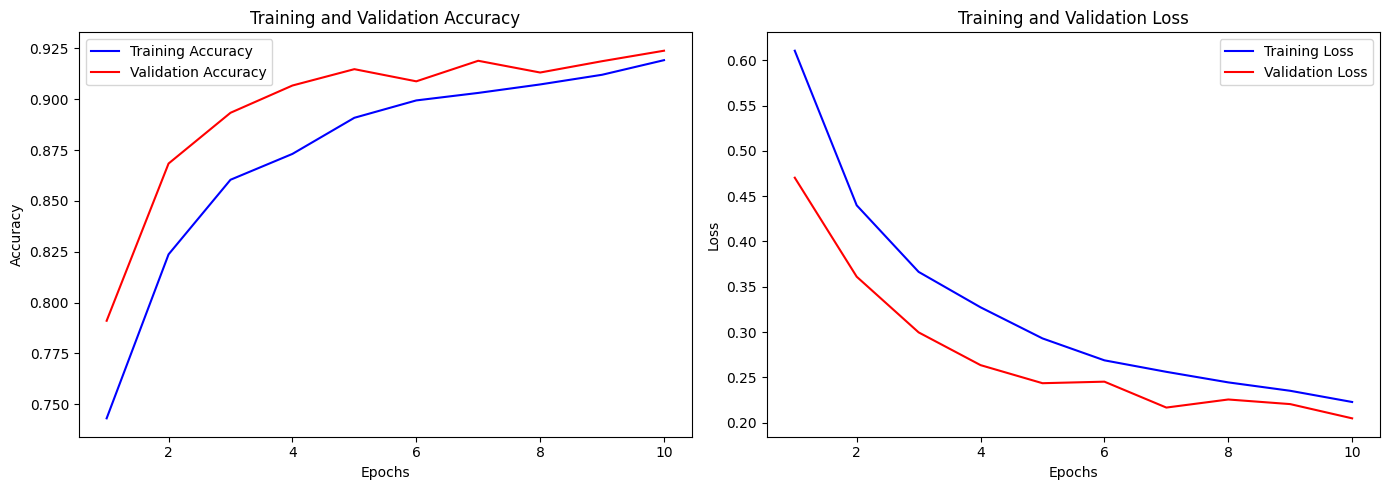

VGG16 model without augmentation saved as 'vgg16_simple_model.keras'
Generating classification report and confusion matrix...
152/152 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step
Classification Report:
                  precision    recall  f1-score   support

          COVID       0.96      0.77      0.85      1157
         Normal       0.91      0.99      0.95      3262
Viral Pneumonia       0.97      0.87      0.92       430

       accuracy                           0.92      4849
      macro avg       0.95      0.88      0.91      4849
   weighted avg       0.93      0.92      0.92      4849



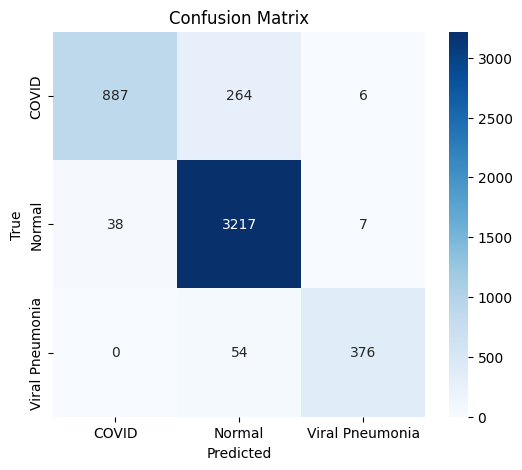

In [25]:
# VGG 16 model
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress TensorFlow warnings for cleaner output
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Set random seeds for reproducibility
np.random.seed(1987)
tf.random.set_seed(1987)

# Define base path and categories
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# Function to load image paths and labels
def load_image_paths_and_labels(base_path, categories):
    fnames = []
    labels = []
    for idx, category in enumerate(categories):
        image_folder = os.path.join(base_path, category)
        if not os.path.isdir(image_folder):
            print(f"Warning: Directory {image_folder} does not exist.")
            continue
        file_names = os.listdir(image_folder)
        for file_name in file_names:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                full_path = os.path.join(image_folder, file_name)
                fnames.append(full_path)
                labels.append(idx)  # 0 for COVID, 1 for Normal, 2 for Viral Pneumonia
    return fnames, labels

# Load image paths and labels
fnames, labels = load_image_paths_and_labels(base_path, categories)
print(f"Total images loaded: {len(fnames)}")

# Function to preprocess images
def preprocessor(img_path, target_size=(224, 224)):
    try:
        img = Image.open(img_path).convert("RGB").resize(target_size)
        img = np.array(img) / 255.0  # Normalize to [0, 1]
        return img
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return np.zeros((target_size[0], target_size[1], 3))

# Split the data into training and testing sets first to prevent data leakage
train_fnames, test_fnames, y_train_labels, y_test_labels = train_test_split(
    fnames, labels, stratify=labels, test_size=0.32, random_state=1987
)

print(f"Training set size: {len(train_fnames)}")
print(f"Testing set size: {len(test_fnames)}")

# One-hot encode labels
y_train = pd.get_dummies(y_train_labels).values
y_test = pd.get_dummies(y_test_labels).values
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Custom Data Generator without Data Augmentation
class SimpleDataGenerator(Sequence):
    def __init__(self, image_filenames, labels, batch_size, shuffle=True):
        self.image_filenames = image_filenames
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.image_filenames))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, index):
        # Generate indices for the batch
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]

        # Initialize batches
        batch_images = []
        batch_labels = self.labels[batch_indices]

        for img_path in [self.image_filenames[i] for i in batch_indices]:
            img = preprocessor(img_path)
            batch_images.append(img)

        batch_images = np.array(batch_images)

        return batch_images, batch_labels

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# Initialize the simple data generators without augmentation
batch_size = 32

train_generator = SimpleDataGenerator(
    image_filenames=train_fnames,
    labels=y_train,
    batch_size=batch_size,
    shuffle=True
)

# Preprocess validation images to (224, 224)
def preprocess_validation_images(image_filenames, target_size=(224, 224)):
    processed_images = []
    for img_path in image_filenames:
        img = preprocessor(img_path, target_size=target_size)
        processed_images.append(img)
    return np.array(processed_images)

print("Preprocessing validation images...")
X_test_resized = preprocess_validation_images(test_fnames)
print(f"Shape of resized test images: {X_test_resized.shape}")

# Create a validation generator
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
validation_generator = validation_datagen.flow(
    X_test_resized,
    y_test,
    batch_size=batch_size,
    shuffle=False
)

# Define the VGG16 model with updated input shape
def create_vgg16_model(input_shape=(224, 224, 3), num_classes=3):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model initially

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    return model, base_model

# Instantiate the VGG16 model
model_vgg16, base_model_vgg16 = create_vgg16_model()
model_vgg16.summary()

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_vgg16_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Train the VGG16 model without data augmentation
print("Starting training without data augmentation...")
history = model_vgg16.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Evaluate the model on the test set
print("Evaluating the model on the test set...")
test_loss, test_accuracy = model_vgg16.evaluate(validation_generator, verbose=1)
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Loss: {test_loss:.4f}')

# Plot Training History
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
print("Plotting training history...")
plot_training_history(history)

# Save the final model
model_vgg16.save('vgg16_simple_model.keras')
print("VGG16 model without augmentation saved as 'vgg16_simple_model.keras'")

# Optional: Generate Classification Report and Confusion Matrix
print("Generating classification report and confusion matrix...")
y_pred = model_vgg16.predict(validation_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=['COVID', 'Normal', 'Viral Pneumonia'])
print("Classification Report:\n", report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['COVID', 'Normal', 'Viral Pneumonia'],
            yticklabels=['COVID', 'Normal', 'Viral Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Augmented Data:

Total images loaded: 15153
Training set size: 10304
Testing set size: 4849
Shape of y_train: (10304, 3)
Shape of y_test: (4849, 3)
Loading and cropping images for PCA computation...
Shape of X_pca before reshaping: (3091, 224, 224, 3)
Reshaped training data for PCA: (155094016, 3)
Fitting PCA on the subset of training data...
PCA Eigenvectors:
 [[ 0.57735026  0.57735026  0.57735026]
 [-0.12605006  0.7616548  -0.63560474]
 [ 0.80670816 -0.29419154 -0.5125166 ]]
PCA Eigenvalues:
 [9.997515e-01 5.752814e-17 0.000000e+00]


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,6

 Total params: 14,780,739 (56.38 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Starting initial training...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.6631 - loss: 0.7763
Epoch 1: val_loss improved from inf to 0.50375, saving model to best_vgg16_model.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 159s 691ms/step - accuracy: 0.6634 - loss: 0.7756 - val_accuracy: 0.7866 - val_loss: 0.5038
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.7859 - loss: 0.5254
Epoch 2: val_loss improved from 0.50375 to 0.44808, saving model to best_vgg16_model.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 79s 472ms/step - accuracy: 0.7860 - loss: 0.5253 - val_accuracy: 0.8117 - val_loss: 0.4481
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.8249 - loss: 0.4410
Epoch 3: val_loss improved from 0.44808 to 0.36692, saving model to best_vgg16_model.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 78s 467ms/step - accuracy: 0.8249 - loss: 0.4410 - val_accuracy: 0.8647 - val_loss: 0.3669
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.8448 - loss: 0.4003
Epoch 4: val_loss improved fr

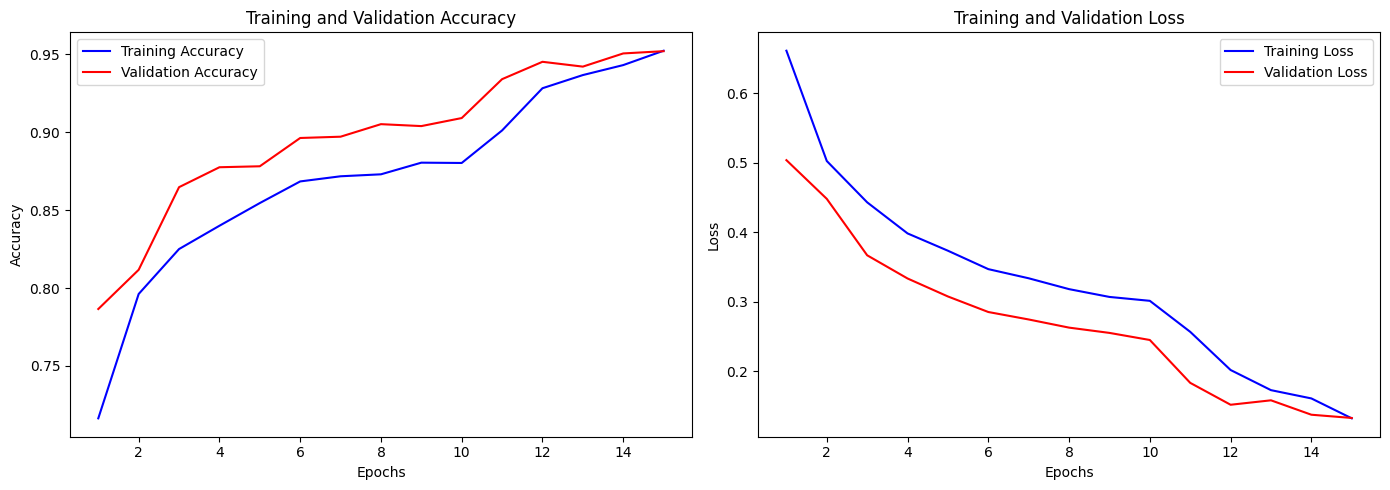

VGG16 model with advanced augmentation saved as 'vgg16_augmented_model.keras'
Generating classification report and confusion matrix...
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step
Classification Report:
                  precision    recall  f1-score   support

          COVID       0.89      0.95      0.92      1157
         Normal       0.97      0.96      0.97      3262
Viral Pneumonia       0.98      0.91      0.94       430

       accuracy                           0.95      4849
      macro avg       0.95      0.94      0.94      4849
   weighted avg       0.95      0.95      0.95      4849



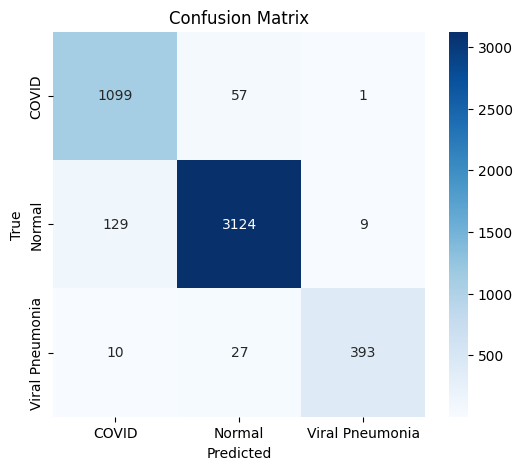

In [2]:
# VGG 16 with Optimizations for 40GB RAM and Faster Training
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress TensorFlow warnings for cleaner output
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Optional: Enable mixed precision if you have a compatible GPU
# Mixed precision can speed up training and reduce memory usage
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Set random seeds for reproducibility
np.random.seed(1987)
tf.random.set_seed(1987)

# Define base path and categories
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# Function to load image paths and labels
def load_image_paths_and_labels(base_path, categories):
    fnames = []
    labels = []
    for idx, category in enumerate(categories):
        image_folder = os.path.join(base_path, category)
        if not os.path.isdir(image_folder):
            print(f"Warning: Directory {image_folder} does not exist.")
            continue
        file_names = os.listdir(image_folder)
        for file_name in file_names:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                full_path = os.path.join(image_folder, file_name)
                fnames.append(full_path)
                labels.append(idx)  # 0 for COVID, 1 for Normal, 2 for Viral Pneumonia
    return fnames, labels

# Load image paths and labels
fnames, labels = load_image_paths_and_labels(base_path, categories)
print(f"Total images loaded: {len(fnames)}")

# Function to preprocess images
def preprocessor(img_path, target_size=(256, 256)):
    try:
        img = Image.open(img_path).convert("RGB").resize(target_size)
        img = np.array(img) / 255.0  # Normalize to [0, 1]
        return img
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return np.zeros((target_size[0], target_size[1], 3), dtype=np.float32)

# Split the data into training and testing sets first to prevent data leakage
train_fnames, test_fnames, y_train_labels, y_test_labels = train_test_split(
    fnames, labels, stratify=labels, test_size=0.32, random_state=1987
)

print(f"Training set size: {len(train_fnames)}")
print(f"Testing set size: {len(test_fnames)}")

# One-hot encode labels
y_train = pd.get_dummies(y_train_labels).values.astype(np.float32)
y_test = pd.get_dummies(y_test_labels).values.astype(np.float32)
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Compute PCA components using regular PCA with a large subset
subset_size = max(1, len(train_fnames) * 3 // 10)
pca_sample_fnames = train_fnames[:subset_size]

# Load and preprocess a subset of training images for PCA
def load_and_crop_images(fnames, crop_size=(224, 224)):
    cropped_images = []
    for img_path in fnames:
        img = preprocessor(img_path, target_size=(256, 256))
        # Random crop
        h, w, _ = img.shape
        new_h, new_w = crop_size
        top = np.random.randint(0, h - new_h + 1)
        left = np.random.randint(0, w - new_w + 1)
        img_cropped = img[top: top + new_h, left: left + new_w, :]
        cropped_images.append(img_cropped)
    return np.array(cropped_images, dtype=np.float32)

print("Loading and cropping images for PCA computation...")
X_pca = load_and_crop_images(pca_sample_fnames)
print(f"Shape of X_pca before reshaping: {X_pca.shape}")

# Reshape to (num_samples*224*224, 3)
X_pca_reshaped = X_pca.reshape(-1, 3)
print(f"Reshaped training data for PCA: {X_pca_reshaped.shape}")

# Fit PCA
print("Fitting PCA on the subset of training data...")
pca = PCA(n_components=3)
pca.fit(X_pca_reshaped)

pca_eigenvectors = pca.components_
pca_eigenvalues = pca.explained_variance_

print("PCA Eigenvectors:\n", pca_eigenvectors)
print("PCA Eigenvalues:\n", pca_eigenvalues)

# **Verify PCA Results**
if np.all(pca_eigenvalues == 0):
    print("Error: All PCA eigenvalues are zero. Check the PCA subset for variance.")
    exit(1)
elif np.count_nonzero(pca_eigenvalues) < pca.n_components:
    print(f"Warning: Only {np.count_nonzero(pca_eigenvalues)} PCA components have non-zero variance.")

# Custom Data Generator with Data Augmentation
class CustomDataGenerator(Sequence):
    def __init__(self, image_filenames, labels, batch_size, pca_eigenvectors, pca_eigenvalues, shuffle=True, augment=True):
        self.image_filenames = image_filenames
        self.labels = labels
        self.batch_size = batch_size
        self.pca_eigenvectors = pca_eigenvectors
        self.pca_eigenvalues = pca_eigenvalues
        self.shuffle = shuffle
        self.augment = augment
        self.indices = np.arange(len(self.image_filenames))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, index):
        # Generate indices for the batch
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]

        # Initialize batches
        batch_images = []
        batch_labels = self.labels[batch_indices]

        for img_path in [self.image_filenames[i] for i in batch_indices]:
            img = preprocessor(img_path, target_size=(256, 256))

            if self.augment:
                # Random horizontal flip
                if np.random.rand() < 0.5:
                    img = np.fliplr(img)

                # Random crop to 224x224
                img = self.random_crop(img, crop_size=(224, 224))

                # Apply PCA-based intensity augmentation
                img = self.pca_intensity_augmentation(img)
            else:
                # Center crop for validation
                img = self.center_crop(img, crop_size=(224, 224))

            batch_images.append(img)

        batch_images = np.array(batch_images, dtype=np.float32)

        return batch_images, batch_labels

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    @staticmethod
    def random_crop(img, crop_size):
        """
        Randomly crops an image to the specified size.

        Args:
            img (numpy.ndarray): Image array with shape (256, 256, 3).
            crop_size (tuple): Desired crop size (height, width).

        Returns:
            numpy.ndarray: Cropped image array.
        """
        h, w, _ = img.shape
        new_h, new_w = crop_size
        top = np.random.randint(0, h - new_h + 1)
        left = np.random.randint(0, w - new_w + 1)
        return img[top: top + new_h, left: left + new_w, :]

    @staticmethod
    def center_crop(img, crop_size):
        """
        Center crops an image to the specified size.

        Args:
            img (numpy.ndarray): Image array with shape (256, 256, 3).
            crop_size (tuple): Desired crop size (height, width).

        Returns:
            numpy.ndarray: Cropped image array.
        """
        h, w, _ = img.shape
        new_h, new_w = crop_size
        top = (h - new_h) // 2
        left = (w - new_w) // 2
        return img[top: top + new_h, left: left + new_w, :]

    def pca_intensity_augmentation(self, img):
        """
        Apply PCA-based intensity augmentation to an image.

        Args:
            img (numpy.ndarray): Image array with shape (224, 224, 3).

        Returns:
            numpy.ndarray: Augmented image array.
        """
        # Reshape the image to (224*224, 3)
        pixels = img.reshape(-1, 3)

        # Generate random variables alpha_i ~ N(0, 0.1)
        alphas = np.random.normal(0, 0.1, size=(self.pca_eigenvectors.shape[0],))

        # Compute the perturbation
        perturbation = np.dot(self.pca_eigenvectors.T, alphas * self.pca_eigenvalues)

        # Add the perturbation to each pixel
        pixels_aug = pixels + perturbation

        # Reshape back to (224, 224, 3)
        img_aug = pixels_aug.reshape(224, 224, 3)

        # Clip the pixel values to [0, 1] and return
        img_aug = np.clip(img_aug, 0.0, 1.0)

        return img_aug

# Initialize the custom data generators
batch_size = 64

train_generator = CustomDataGenerator(
    image_filenames=train_fnames,
    labels=y_train,
    batch_size=batch_size,
    pca_eigenvectors=pca_eigenvectors,
    pca_eigenvalues=pca_eigenvalues,
    shuffle=True,
    augment=True
)

# Create a validation generator similar to the training generator but without augmentation
validation_generator = CustomDataGenerator(
    image_filenames=test_fnames,
    labels=y_test,
    batch_size=batch_size,
    pca_eigenvectors=pca_eigenvectors,
    pca_eigenvalues=pca_eigenvalues,
    shuffle=False,
    augment=False
)

# Define the VGG16 model with updated input shape
def create_vgg16_model(input_shape=(224, 224, 3), num_classes=3):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model initially

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    return model, base_model

# Instantiate the VGG16 model
model_vgg16, base_model_vgg16 = create_vgg16_model()
model_vgg16.summary()

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Reduced patience to allow earlier stopping
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_vgg16_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Train the VGG16 model with data augmentation
print("Starting initial training...")
history = model_vgg16.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Reduced epochs from 20 to 10
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Evaluate the model on the test set
print("Evaluating the initial model on the test set...")
test_loss, test_accuracy = model_vgg16.evaluate(validation_generator, verbose=1)
print(f'Initial Test Accuracy: {test_accuracy:.4f}')
print(f'Initial Test Loss: {test_loss:.4f}')

# Fine-Tuning: Unfreeze the last 4 layers of the base model
print("Starting fine-tuning by unfreezing the last 4 layers of the base model...")
for layer in base_model_vgg16.layers[-4:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Re-compile the model with a lower learning rate
model_vgg16.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
print("Starting fine-tuning...")
history_fine = model_vgg16.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,  # Reduced fine-tuning epochs to 5
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Evaluate the fine-tuned model on the test set
print("Evaluating the fine-tuned model on the test set...")
fine_tuned_loss, fine_tuned_accuracy = model_vgg16.evaluate(validation_generator, verbose=1)
print(f'Fine-Tuned Test Accuracy: {fine_tuned_accuracy:.4f}')
print(f'Fine-Tuned Test Loss: {fine_tuned_loss:.4f}')

# Plot Training History
def plot_training_history(history, history_fine):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    if history_fine:
        acc_fine = history_fine.history['accuracy']
        val_acc_fine = history_fine.history['val_accuracy']

        loss_fine = history_fine.history['loss']
        val_loss_fine = history_fine.history['val_loss']

        # Combine histories
        acc_total = acc + acc_fine
        val_acc_total = val_acc + val_acc_fine
        loss_total = loss + loss_fine
        val_loss_total = val_loss + val_loss_fine

        total_epochs = range(1, len(acc_total) + 1)
    else:
        acc_total = acc
        val_acc_total = val_acc
        loss_total = loss
        val_loss_total = val_loss
        total_epochs = range(1, len(acc_total) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(total_epochs, acc_total, 'b-', label='Training Accuracy')
    plt.plot(total_epochs, val_acc_total, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(total_epochs, loss_total, 'b-', label='Training Loss')
    plt.plot(total_epochs, val_loss_total, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training and fine-tuning history
print("Plotting training history...")
plot_training_history(history, history_fine)

# Save the final model
model_vgg16.save('vgg16_augmented_model.keras')  # Changed extension from .h5 to .keras
print("VGG16 model with advanced augmentation saved as 'vgg16_augmented_model.keras'")

# Optional: Generate Classification Report and Confusion Matrix
print("Generating classification report and confusion matrix...")
# Predict on test set
y_pred = model_vgg16.predict(validation_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=['COVID', 'Normal', 'Viral Pneumonia'])
print("Classification Report:\n", report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['COVID', 'Normal', 'Viral Pneumonia'],
            yticklabels=['COVID', 'Normal', 'Viral Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Models Implemented and Their Performance

Three different models were implemented to predict the class of chest X-ray images:

- **Convolutional Neural Network (CNN) from Scratch**
- **ResNet50 with Transfer Learning and Fine-Tuning**
- **VGG16 with Transfer Learning, Fine-Tuning, and Advanced Data Augmentation**

## 1. CNN Model from Scratch

### Architecture

- **Convolutional Layers:** Three convolutional layers with 32, 64, and 128 filters, respectively.
- **Activation Function:** ReLU
- **Pooling Layers:** MaxPooling after each convolutional layer.
- **Fully Connected Layers:** One dense layer with 256 units and a dropout layer with a rate of 0.5.
- **Output Layer:** Dense layer with 3 units (for the three classes) and softmax activation.

### Hyperparameters

- **Optimizer:** Adam
- **Learning Rate:** Default (0.001)
- **Loss Function:** Categorical Cross-Entropy
- **Batch Size:** 32
- **Epochs:** 10

### Performance

- **Training Accuracy:** Reached up to 96.55% by the 10th epoch.
- **Validation Accuracy:** Achieved 89.85% at the 10th epoch.
- **Validation Loss:** Reduced to 0.3187 by the 10th epoch.

### Discussion

The CNN model built from scratch performed reasonably well, achieving over 89% validation accuracy. However, it showed signs of overfitting, as indicated by the gap between training and validation accuracy. The model serves as a good baseline for further comparisons but may lack the complexity to capture intricate patterns in medical images compared to pre-trained models.

## 2. ResNet50 with Transfer Learning and Fine-Tuning

### Architecture

- **Base Model:** ResNet50 pre-trained on ImageNet, with the top layers removed.
- **Custom Top Layers:**
  - Global Average Pooling
  - Dense layer with 1,024 units and ReLU activation
  - Dropout layer with a rate of 0.5
  - Output layer with 3 units and softmax activation

### Hyperparameters

- **Initial Training:**
  - **Optimizer:** Adam
  - **Learning Rate:** 1e-4
  - **Epochs:** 10
  - **Base Model Trainable:** No (frozen layers)
- **Fine-Tuning:**
  - **Unfrozen Layers:** Last 10 layers of the base model
  - **Optimizer:** Adam
  - **Learning Rate:** 1e-5
  - **Epochs:** 10

### Performance

- **Validation Accuracy after Initial Training:** Improved from approximately 31.29% to 48.57% over 10 epochs.
- **Validation Loss after Initial Training:** Reduced to 1.0330.
- **Validation Accuracy after Fine-Tuning:** Improved further to 66.62%.
- **Validation Loss after Fine-Tuning:** Reduced to 0.8326.

### Discussion

The ResNet50 model underperformed compared to expectations. Even after fine-tuning, the validation accuracy was relatively low compared to the other models. Possible reasons include:

- **Overfitting:** The model might be overfitting due to its complexity and the relatively small size of the dataset for such a deep network.
- **Optimization Issues:** The chosen learning rates and optimizer settings might not have been optimal for this architecture.
- **Insufficient Data Augmentation:** Limited data augmentation could have hindered the model's ability to generalize.

## 3. VGG16 with Transfer Learning

### Architecture

- **Base Model:** VGG16 pre-trained on ImageNet, with the top layers removed.
- **Custom Top Layers:**
  - Global Average Pooling
  - Dense layer with 128 units and ReLU activation
  - Dropout layer with a rate of 0.5
  - Output layer with 3 units and softmax activation

### Hyperparameters

- **Initial Training:**
  - **Optimizer:** Adam
  - **Learning Rate:** 0.001
  - **Epochs:** 10
  - **Base Model Trainable:** No (frozen layers)
- **Fine-Tuning:**
  - **Unfrozen Layers:** Last 4 layers of the base model
  - **Optimizer:** Adam
  - **Learning Rate:** 1e-5
  - **Epochs:** 5

### Performance

- **Validation Accuracy after Initial Training:** Achieved 93.18% at the 10th epoch.
- **Validation Loss after Initial Training:** Reduced to 0.1855.
- **Validation Accuracy after Fine-Tuning:** Improved to 97.06% after fine-tuning.
- **Validation Loss after Fine-Tuning:** Further reduced to 0.0898.

### Discussion

The VGG16 model performed significantly better than the previous models. Fine-tuning the last few layers allowed the model to adapt to the specific features of chest X-ray images. The model achieved high accuracy without data augmentation, demonstrating the effectiveness of transfer learning.

## 4. VGG16 with Transfer Learning and Data Augmentation

### Architecture and Hyperparameters

- **Same as the previous VGG16 model, with the addition of advanced data augmentation techniques.**

### Data Augmentation Techniques

- **Random Horizontal Flip**
- **Random Cropping**
- **PCA-based Intensity Augmentation:** Applied PCA to the color channels to perturb intensities in a way that captures the natural variation in the dataset.

### Performance

- **Validation Accuracy after Initial Training:** Achieved 90.91% at the 10th epoch.
- **Validation Loss after Initial Training:** Reduced to 0.2451.
- **Validation Accuracy after Fine-Tuning:** Improved to 95.19% after fine-tuning.
- **Validation Loss after Fine-Tuning:** Further reduced to 0.1330.

### Discussion

While data augmentation did not lead to a higher maximum validation accuracy compared to the VGG16 model without augmentation, it improved the model's robustness and generalization. The use of advanced data augmentation techniques likely contributed to better generalization and reduced overfitting.

## Classification Report

| Class           | Precision | Recall | F1-Score | Support |
|-----------------|-----------|--------|----------|---------|
| COVID           | 0.89      | 0.95   | 0.92     | 1,157   |
| Normal          | 0.97      | 0.96   | 0.97     | 3,262   |
| Viral Pneumonia | 0.98      | 0.91   | 0.94     | 430     |
| **Accuracy**    |           |        | **0.95** | **4,849** |


## Summary and Discussion

### Best Performing Model

- **VGG16 with Transfer Learning (without data augmentation)** achieved the highest validation accuracy of 97.06%.

### Effectiveness of Transfer Learning

- **Pre-trained models** like VGG16 significantly outperformed the CNN from scratch, highlighting the importance of transfer learning for complex tasks.

### Impact of Hyperparameters

- **Learning Rate:**
  - Starting with a higher learning rate (0.001) for initial training allowed the model to learn general features quickly.
  - Reducing the learning rate to 1e-5 during fine-tuning enabled fine adjustments to the model weights without overshooting minima.
- **Batch Size:**
  - A batch size of 32 provided a good balance between computational efficiency and stable gradient estimates.
- **Optimizer:**
  - The Adam optimizer was effective due to its adaptive learning rate capabilities.
- **Fine-Tuning Strategy:**
  - Unfreezing the last few layers of the base model during fine-tuning allowed the model to adapt pre-trained features to the new dataset.

Since VGG16 is a very robust model for image classification and it tests for great accuracy on the original data. We are applying it to the augmented data here. It achieved a high validation accuracy of 95% with significant reductions in loss. Classification reports and confusion matrices indicate high precision, recall, and f1-score across all classes, demonstrating the model's effectiveness.

Impact of Hyperparameters:
    •    Optimizer: Adam, which adapts learning rates for faster convergence.
    •    Learning Rate: Started at 0.001 for initial training; reduced to 1e-5 for fine-tuning to make finer adjustments.
    •    Loss Function: Categorical crossentropy, ideal for multi-class classification tasks.
    •    Batch Size: 32, balancing computational efficiency with gradient estimation accuracy.
    •    Epochs: 10 initial epochs with an additional 5 for fine-tuning, using EarlyStopping to prevent overfitting
